In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import Experiment

In [3]:
%matplotlib inline

In [4]:
config = 'config.yaml'
exp = Experiment(config)

Seed: 0


In [10]:
x0 = exp.generate_data(mu_inj=0, n=10000)
x1 = exp.generate_data(mu_inj=1, n=10000)

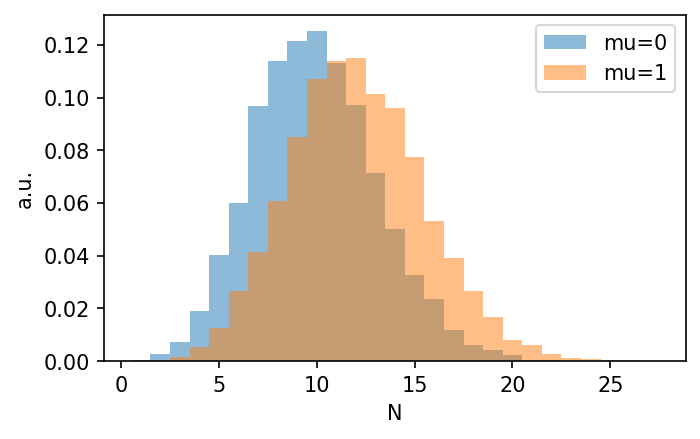

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)

n_max = max(x0.max(), max(x1).max())
integer_bins = np.linspace(0, n_max, n_max+1) + 0.5
ax.hist(x0.flatten(), bins=integer_bins, alpha=0.5, label='mu=0', density=True)
ax.hist(x1.flatten(), bins=integer_bins, alpha=0.5, label='mu=1', density=True)
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('a.u.')
plt.show()

In [14]:
mu_scan = np.linspace(0, 10, 20)
exp.get_q_distributions(mu_scan, n=1000)

100%|██████████| 20/20 [00:00<00:00, 7108.99it/s]


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_43155/2714451292.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.hist(exp.q_distributions[mu_scan[i]], label='$\mu_{inj}$=' + f'{mu_scan[i]:.2f}', bins=bins, alpha=0.5, density=True)
/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_43155/2714451292.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/ets/miniconda3/envs/torchmetal/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


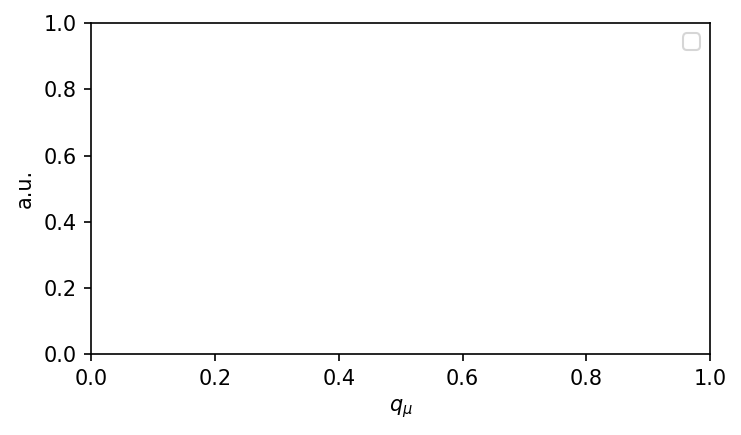

In [15]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)
bins = np.linspace(0, 1, 40)

# Initialize the plot
def init():
    ax.clear()
    ax.set_xlabel('$q_{\\mu}$')
    ax.set_ylabel('a.u.')
    ax.legend()
    return ax,

# Update function for each frame
def update(i):
    ax.clear()
    ax.hist(exp.q_distributions[mu_scan[i]], label='$\mu_{inj}$=' + f'{mu_scan[i]:.2f}', bins=bins, alpha=0.5, density=True)
    ax.set_xlabel('$q_{\\mu=' + f'{exp.mu:.2f}' + '}$')
    ax.set_ylabel('a.u.')
    ax.set_ylim(0, 50)
    ax.set_xlim(bins[0], bins[-1])
    ax.legend()
    plt.tight_layout()
    return ax,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(mu_scan), init_func=init, blit=False)

# Display the animation
HTML(ani.to_jshtml())

In [18]:
exp.data = exp.generate_data(mu_inj=0, n=1)
result = exp.get_upper_limit()

mu_hat: [[1.99999999]], q_hat: [1.42122263]


In [19]:
result

{'mu_upper_limit': 6.0272232304900175,
 'p_mu_null': 0.10199999999999998,
 'p_mu_alt': array([0.849, 0.743, 0.652, 0.544, 0.455, 0.319, 0.261, 0.185, 0.141,
        0.08 , 0.058, 0.029, 0.032, 0.012, 0.006, 0.004, 0.005, 0.001,
        0.001]),
 'mu_inj_alt': array([ 0.52631579,  1.05263158,  1.57894737,  2.10526316,  2.63157895,
         3.15789474,  3.68421053,  4.21052632,  4.73684211,  5.26315789,
         5.78947368,  6.31578947,  6.84210526,  7.36842105,  7.89473684,
         8.42105263,  8.94736842,  9.47368421, 10.        ]),
 'CLs': array([0.9454343 , 0.82739421, 0.72605791, 0.60579065, 0.50668151,
        0.35523385, 0.29064588, 0.20601336, 0.15701559, 0.08908686,
        0.06458797, 0.03229399, 0.03563474, 0.01336303, 0.00668151,
        0.00445434, 0.00556793, 0.00111359, 0.00111359])}

(<Figure size 750x450 with 1 Axes>,
 <Axes: xlabel='$q_{inj}$', ylabel='$p_{\\mu=0.00}$'>)

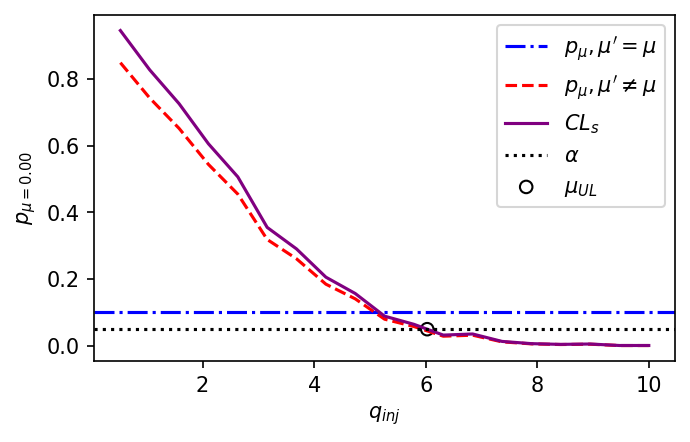

In [20]:
exp.plot_single_limit(result)

In [32]:
limits = []
results = []
sigmas = np.linspace(0, 1, 10)

for sigma in sigmas:
    exp.bkg_sigma = sigma
    exp.get_q_distributions()
    result = exp.get_upper_limit()
    results.append(result)
    limits.append(result['mu_upper_limit'])

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Text(0, 0.5, 'Upper limit')

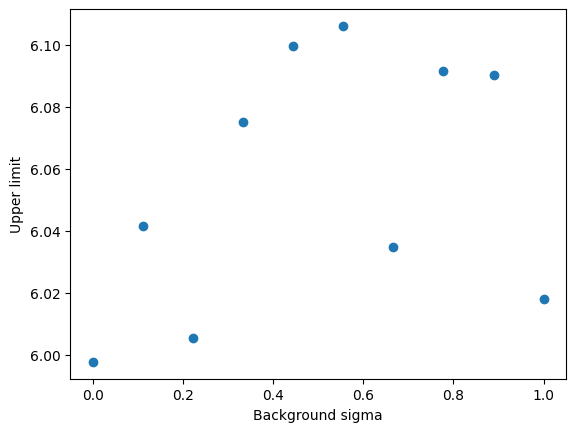

In [34]:
plt.scatter(sigmas, limits, label='Upper limit')
plt.xlabel('Background sigma')
plt.ylabel('Upper limit')